In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


***Load Data:***

---



Dataset loaded successfully!
Dataset Shape: (5728, 2)

First 5 rows:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None

Label Distribution:
spam
0    4360
1    1368
Name: count, dtype: int64


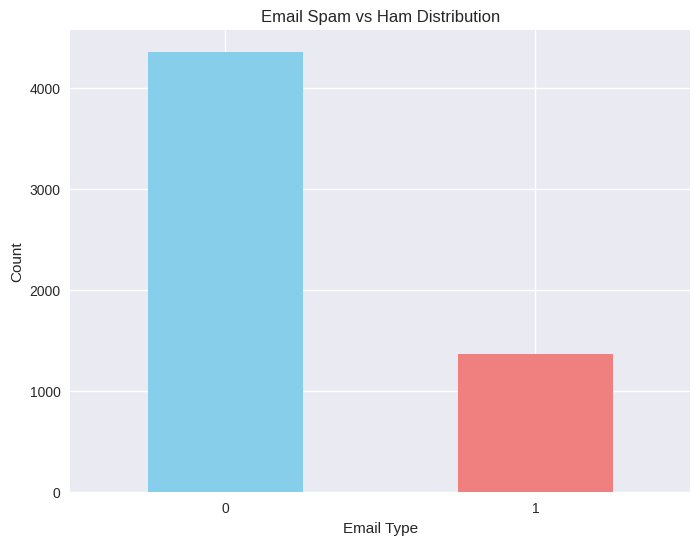

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('/content/emails.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    # Create a sample dataset for demonstration
    print("Creating sample dataset for demonstration...")
    sample_data = {
        'text': [
            'WINNER!! You have won a $1000 gift card! Call now to claim.',
            'Hi John, can we schedule a meeting for tomorrow?',
            'URGENT: Your account needs verification. Click here now!',
            'Reminder: Team lunch at 1 PM today.',
            'FREE iPhone! Limited time offer. Reply NOW!',
            'Meeting notes from yesterday attached.',
            'CONGRATULATIONS! You are selected for a prize.',
            'Project update: The deadline has been extended.',
            'Earn money fast working from home!',
            'Hi, please find the report attached.'
        ],
        'spam': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] # Changed label to spam
    }
    df = pd.DataFrame(sample_data)


# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nLabel Distribution:")
print(df['spam'].value_counts()) # Changed label to spam

# Visualize the label distribution
plt.figure(figsize=(8, 6))
df['spam'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral']) # Changed label to spam
plt.title('Email Spam vs Ham Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

***Data Preprocessing and Cleaning***

In [ ]:
# Initialize text preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    """
    Clean and preprocess text data
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        # Tokenize and remove stopwords
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]

        # Apply stemming
        tokens = [stemmer.stem(word) for word in tokens]

        return ' '.join(tokens)
    else:
        return ''

# Apply text preprocessing
print("Preprocessing text data...")
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("\nOriginal vs Cleaned Text:")
for i in range(3):
    print(f"Original: {df['text'].iloc[i]}")
    print(f"Cleaned: {df['cleaned_text'].iloc[i]}")
    print("-" * 50)

Preprocessing text data...

Original vs Cleaned Text:
Original: Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see lo

 Feature Extraction

In [ ]:
# Method 1: TF-IDF Vectorization
print("Extracting features using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Method 2: Count Vectorization (for comparison)
print("Extracting features using Count Vectorizer...")
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['spam'])

print(f"TF-IDF Features shape: {X_tfidf.shape}")
print(f"Count Features shape: {X_count.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Show some feature names
print("\nSample feature names from TF-IDF:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

Extracting features using TF-IDF...
Extracting features using Count Vectorizer...
TF-IDF Features shape: (5728, 5000)
Count Features shape: (5728, 5000)
Labels shape: (5728,)
Class mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}

Sample feature names from TF-IDF:
['aa' 'ab' 'ab html' 'abil' 'abl' 'absenc' 'absolut' 'abstract' 'abus'
 'ac' 'academ' 'acadia' 'acceler' 'accept' 'access' 'access request'
 'accommod' 'accomod' 'accompani' 'accomplish']


***Split Data into Training and Testing Sets***

In [ ]:
# Split the data (using TF-IDF features by default)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# Also create splits for count features for comparison
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    X_count, y, test_size=0.2, random_state=42, stratify=y
)

Training set size: 4582
Testing set size: 1146
Training features shape: (4582, 5000)
Testing features shape: (1146, 5000)


***Train Multiple Models***

In [ ]:
# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True) # Added probability=True
}

# Train models and store results
results = {}

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")

    # Use appropriate features (Naive Bayes works better with count features)
    if name == 'Naive Bayes':
        model.fit(X_train_count, y_train_count)
        y_pred = model.predict(X_test_count)
        accuracy = accuracy_score(y_test_count, y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }

    print(f"{name} Accuracy: {accuracy:.4f}")

Training models...
Training Naive Bayes...
Naive Bayes Accuracy: 0.9825
Training Logistic Regression...
Logistic Regression Accuracy: 0.9834
Training Random Forest...
Random Forest Accuracy: 0.9860
Training SVM...
SVM Accuracy: 0.9895


*** Evaluate Model Performance***

Model Performance Comparison:
--------------------------------------------------
Naive Bayes: 0.9825
Logistic Regression: 0.9834
Random Forest: 0.9860
SVM: 0.9895


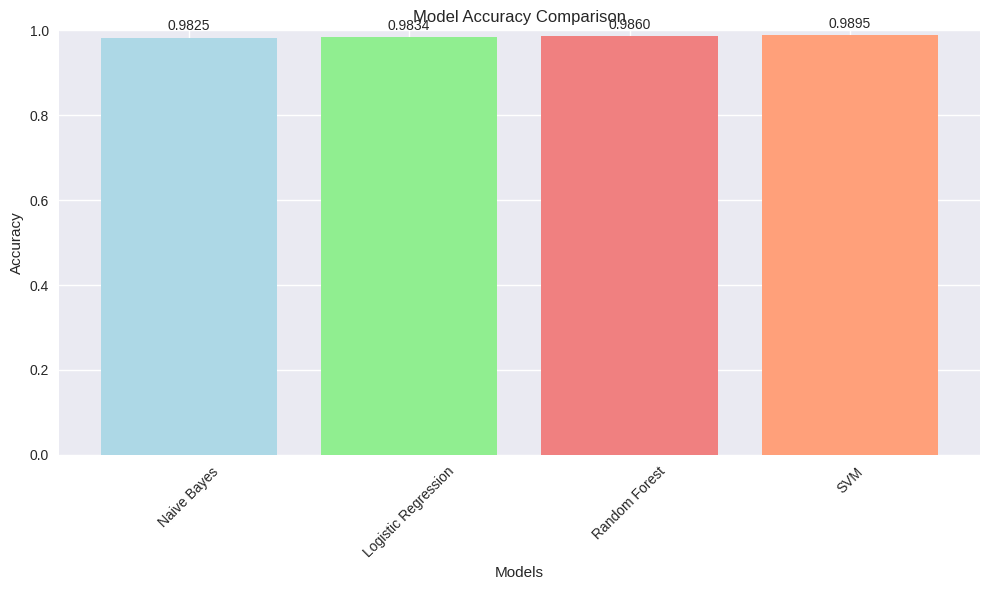

In [ ]:
# Compare model performances
print("Model Performance Comparison:")
print("-" * 50)
for name, result in results.items():
    print(f"{name}: {result['accuracy']:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

bars = plt.bar(model_names, accuracies, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Detailed Evaluation of Best Model***

Best Model: SVM
Best Accuracy: 0.9895

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       872
           1       0.99      0.97      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.99      1146
weighted avg       0.99      0.99      0.99      1146



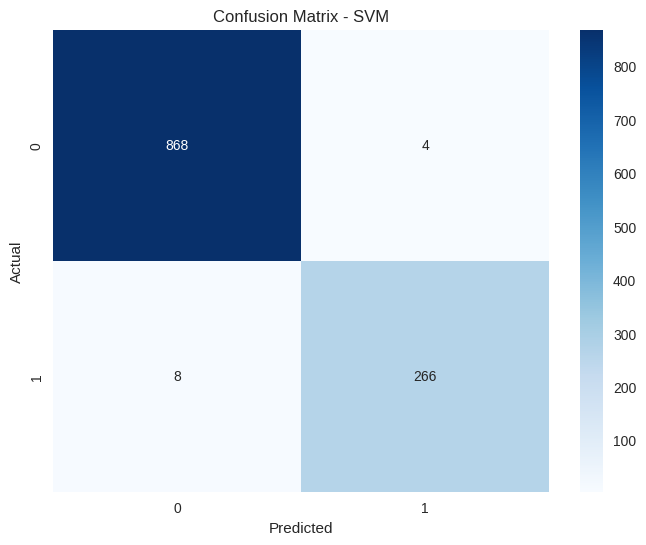

In [ ]:
# Find the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test, best_predictions,
                          target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***Feature Importance Analysis***

In [ ]:
# Analyze feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("Analyzing Feature Importance...")

    # Get feature names and coefficients
    feature_names = tfidf_vectorizer.get_feature_names_out()
    coefficients = best_model.coef_[0]

    # Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': coefficients
    })

    # Get top 10 spam indicators
    top_spam_features = feature_importance.nlargest(10, 'importance')

    # Get top 10 ham indicators
    top_ham_features = feature_importance.nsmallest(10, 'importance')

    print("\nTop 10 Spam Indicators:")
    print(top_spam_features)

    print("\nTop 10 Ham Indicators:")
    print(top_ham_features)

    # Plot top features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Spam features
    ax1.barh(top_spam_features['feature'], top_spam_features['importance'])
    ax1.set_title('Top 10 Spam Indicators')
    ax1.set_xlabel('Coefficient Value')

    # Ham features

    ax2.barh(top_ham_features['feature'], top_ham_features['importance'])
    ax2.set_title('Top 10 Ham Indicators')
    ax2.set_xlabel('Coefficient Value')

    plt.tight_layout()
    plt.show()

***Create Prediction Function and Test on New Emails***

In [ ]:
def predict_spam(email_text, model, vectorizer, label_encoder):
    """
    Predict if an email is spam or not
    """
    # Preprocess the text
    cleaned_text = preprocess_text(email_text)

    # Transform using the same vectorizer
    features = vectorizer.transform([cleaned_text])

    # Make prediction
    prediction = model.predict(features)
    probability = model.predict_proba(features)

    # Convert back to original label
    predicted_label = label_encoder.inverse_transform(prediction)[0]
    spam_probability = probability[0][1]  # Probability of being spam

    return predicted_label, spam_probability

# Test the model on new email examples
test_emails = [
    "Congratulations! You've won a free vacation to Hawaii! Click here to claim now!",
    "Hi team, please find the meeting agenda attached for our weekly sync.",
    "URGENT: Your bank account needs immediate verification. Please login now!",
    "Reminder: Your dental appointment is scheduled for tomorrow at 3 PM.",
    "Get rich quick! Earn $5000 per week working from home with no experience needed!"
]

print("Testing Model on New Emails:")
print("=" * 60)

for i, email in enumerate(test_emails, 1):
    prediction, spam_prob = predict_spam(email, best_model, tfidf_vectorizer, label_encoder)
    print(f"Email {i}:")
    print(f"Text: {email}")
    print(f"Prediction: {prediction}")
    print(f"Spam Probability: {spam_prob:.4f}")
    print(f"Confidence: {'High' if spam_prob > 0.7 or spam_prob < 0.3 else 'Medium'}")
    print("-" * 50)

Testing Model on New Emails:
Email 1:
Text: Congratulations! You've won a free vacation to Hawaii! Click here to claim now!
Prediction: 1
Spam Probability: 0.9913
Confidence: High
--------------------------------------------------
Email 2:
Text: Hi team, please find the meeting agenda attached for our weekly sync.
Prediction: 0
Spam Probability: 0.0003
Confidence: High
--------------------------------------------------
Email 3:
Text: URGENT: Your bank account needs immediate verification. Please login now!
Prediction: 1
Spam Probability: 0.9860
Confidence: High
--------------------------------------------------
Email 4:
Text: Reminder: Your dental appointment is scheduled for tomorrow at 3 PM.
Prediction: 0
Spam Probability: 0.0009
Confidence: High
--------------------------------------------------
Email 5:
Text: Get rich quick! Earn $5000 per week working from home with no experience needed!
Prediction: 1
Spam Probability: 0.8617
Confidence: High
--------------------------------------

***Model Saving and Final Summary***

In [ ]:
import joblib
import pickle

# Save the trained model and preprocessing objects
print("Saving model and preprocessing objects...")

# Create a dictionary with all necessary components
spam_classifier = {
    'model': best_model,
    'vectorizer': tfidf_vectorizer,
    'label_encoder': label_encoder,
    'preprocessing_function': preprocess_text
}

# Save using joblib
joblib.dump(spam_classifier, 'spam_classifier_model.pkl')

print("Model saved successfully as 'spam_classifier_model.pkl'")

# Final summary
print("\n" + "="*60)
print("FINAL MODEL SUMMARY")
print("="*60)
print(f"Best Model: {best_model_name}")
print(f"Final Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Feature Dimension: {X_tfidf.shape[1]}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print(f"Model saved: spam_classifier_model.pkl")
print("="*60)

Saving model and preprocessing objects...
Model saved successfully as 'spam_classifier_model.pkl'

FINAL MODEL SUMMARY
Best Model: SVM
Final Accuracy: 0.9895
Feature Dimension: 5000
Training Samples: 4582
Testing Samples: 1146
Model saved: spam_classifier_model.pkl


***Use the save Model:***

In [ ]:

def load_and_predict(email_text):
    """
    Load the saved model and make predictions
    """
    # Load the model
    spam_classifier = joblib.load('spam_classifier_model.pkl')

    model = spam_classifier['model']
    vectorizer = spam_classifier['vectorizer']
    label_encoder = spam_classifier['label_encoder']
    preprocess_func = spam_classifier['preprocessing_function']

    # Preprocess and predict
    cleaned_text = preprocess_func(email_text)
    features = vectorizer.transform([cleaned_text])
    prediction = model.predict(features)
    probability = model.predict_proba(features)

    predicted_label = label_encoder.inverse_transform(prediction)[0]
    spam_probability = probability[0][1]

    return predicted_label, spam_probability

# Test the loading function
test_email = "*****************************"
label, prob = load_and_predict(test_email)
print(f"Test Email: {test_email}")
print(f"Prediction: {label}")
print(f"Spam Probability: {prob:.4f}")

Test Email: *****************************
Prediction: 0
Spam Probability: 0.1620
